##### Paul Mc Grath - Machine Learning & Stats- Winter 2022 Module- Assessment  
---

[link to my public repository on Github](https://github.com/doodymack/Machine_Learn_Stats-Assessment/tree/main/Time%20Series%20Anomaly%20Detection-Keras) email: polmaccraith@outlook.com

# Time Series Anomaly Detection

***

https://keras.io/examples/timeseries/timeseries_anomaly_detection/  

Link to Source Material [Time_Series_Anomaly_Detection](https://keras.io/examples/timeseries/timeseries_anomaly_detection/ "Time Series Anomaly Detection").  



#### Introduction:

TensorFlow is an end-to-end platform for machine learning. It supports the following:

- Multidimensional-array based numeric computation  
- GPU and distributed processing  
- Automatic differentiation  
- Model construction, training, and export

#### Keras  

TensorFlow is an end-to-end platform for machine learning. It supports the following:

- Multidimensional-array based numeric computation  
- GPU and distributed processing  
- Automatic differentiation  
- Model construction, training, and export


Much of the world's data is streaming, time-series data, where anomalies give significant information in critical situations.  
These exist in diverse areas such as IT, Mecical, Onling Gambling, Enerty and Security.  
Detecting anomalies in streaming data is a difficult task, requiring detectors to process data in real-time and learn while simultaneously making predictions.  
There are limited benchmarks to adequately test and score the efficacy of real-time anomaly detectors.
<br><br>

#### Numenta Anomaly Benchmark  

Numenta Anomaly Benchmark [NAB][1] provides a public repository of open-source tools that can be used to test and measure anomaly detection algorithms on time-series streaming data.  
NAB supplies benchmark datasets with labeled, real-world time-series data.  
NAB provides artifical timeseries data containing labeled anomalous periods of behavior. Data are ordered, timestamped, single-valued metrics.  
In this notebook I will present the use of Keras to attempt to detect a time-series anomaly from one NAB dataset, *art_daily_small_noise.csv* file  and the *art_daily_jumpsup.csv* file from the NAB repository.  
In doing so the notebook will demonstrate how Keras can be put to use to detect real-time anomalies in time-series data.


[1]: <https://github.com/numenta/NAB>

Link to Source Material [Time_Series_Anomaly_Detection](https://keras.io/examples/timeseries/timeseries_anomaly_detection/).

In [1]:
# FIRST IMPORT ALL THE LIBRARIES/PACKAGES THAT NOTEBOOK USED BY DEFAULT
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Layers of Neural networks.
import tensorflow.keras as keras 

# then change code below where layers.input to keras.layers.input
# no longer require from tensorflow.keras import layers
# makes the code function clearer to 3rd party - in code cell know where the layers are coming from
# anytime change code- rerun the kernel
# get in the habit of restart/run all
# keep record of changes

# Plotting
import matplotlib.pyplot as plt

copied and pasted each code from the above link into the notebook

can explore github in link/ look at raw source code

jupyter notebook available- could download this simply but better to:

- copy and paste in the libraries/code one by one and run it one by one

- check you get the same output as webpage
 
- look at what the code is doing/ run the plots 
 
- try to explain what is happening

data analytics: domain specific knowledge- someone might show this issue to you/someone else did this

can you figure it out/ this shouldnt stop you exploring - figuring out

you may start by knowing v little other than use numpy, ploy, keras, training the model, test data etc

initially not a lot we understand, goal is to explain it in the notebook

start by checking the code- do they run?




## Data

***

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

Numenta Anomaly Benchmark (NAB) - look this up from kaggle above

 all data is fully open source
 
 tell you all about tyhe datasets in there

kaggle has a link to github including code

two different csv files loaded in code
 
 - artificial no anomaly/art_daily_small_noise,csv
 - artificial with anomaly/art_daily_small_noise,csv etetc
seems to be 2 different datasets

expect explanation of the two different links contents

lot of markdowns explaining where data set comes from

what it contains 

make plots llok nicer?

lot more explanations of whats going on

#### 'Refactoring the code'- modify it, clean it up etc 
#### Get a much greater feel of whatds going on
#### check whats in url
doesn't explain whats going on <br>
write a narrative for classmate so they could understand

if  try to go to master_url_root below 

returns 404 in browser 

url is only meant to link to raw github content

code is getting pandas to read csv file - 2 different csvs

betetr to gp directly to github itself

i.e. its in the numenta-NAB-master- data sub folder

searck through these- find the CSV's

if pd.read_csv(url)  it will error i.e. can't parse

why: whats shown in github is html  (same as ipynb)

-click on raw- get the raw file

create a str x2

no_anomaly_url = <url>
with_anomaly_url = <url>
make urls direct links to csv
see below root url + link to csv

in python do not have a code >79 chars (Python style guide  as per https://peps.python.org/pep-0008/)

hence see below root url + link to csv to tidy up 

In [2]:

# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [3]:
# NAME OF FOLDER AND FILE IN REPOSITORY
# HAVE A LOOK AT THE URL
# WILL OPEN AS A TEXTBOX
# DESCRIBE- DATASET WITH TIMESTAMPS AND NUMBER IN 2ND COLUMN
# SENSE CHECKING IN FILE
# SOME VALUES HAVE MORE DECIMALS IN CSV- UNUSUAL
# SOME LOOK LIKE ROUNDED
# return the no_anomaly_url
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
# HAVE A LOOK AT THE URL
# OPEN IN BROWSER
# DESCRIBE- DATASET WITH TIMESTAMPS AND NUMBER IN 2ND COLUMN
# SENSE CHECKING IN FILE
# SOME VALUES HAVE MORE DECIMALS IN CSV- UNUSUAL
# SOME LOOK LIKE ROUNDED
# return the with_anomaly_url
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [5]:
# # define df_small_noise as read in csv
## describe the connection between no_anomaly_url and small_noise
# i.e. why call it that
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [6]:
# lets havea look at dataset
# GOOD PRACTICE TO DO DUE DILIGNECE ON DATASET
# OPEN DATASETS IN GITHUB URL AS PER NOTES
# CHECK THE # OF ROWS IN DATASET
# I.E. 4032 (4033 INC HEADER)

# CAN USE DESCRIBE AS BELOW  
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [7]:
# RETURN THE SHAPE
# PANDAS RETURNS A DF WITH 4032 ROWS
# JUST ONE FIELD. CAUTION
# INDEX _COL ='TIMESTAMP'
# DF INDEXED NOT WITH STANDARD NUMBERS
# PANDAS THINKS ITS JUST ONE COLUMN AS INDEX DECLARED (TIMESTAMP) IS INDEX
df_small_noise.shape

(4032, 1)

In [8]:
# describe the dataframe
# SUMMARY STATISTICS
# GOOD TO RUN AND COMMENT
# EXPLANATION SHOULD BE PITCHED AT CLASSMATE
# NO END IN FUNCTIONS- UNLESS NOTEWORTHY LEAVE IT OUT
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [9]:
# pandas show the 1st value in df
# REPEAT AS ABOVE TO CHECK DATASET
# SANITY CHECK 1ST ROW IN DF
# IS IT SAME AS RETURNED IN (HEAD)
# GIVE ME THE THIN AS INDEX 0
# INDEX IS TIMESTAMP
# ILOC ROW 1 OS 0 , ROW 2 IS 1
# FLOAT 64 FORMAT MIGHT LIMIT THE DECIMAL PLACES IN PANDAS?
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [10]:
# pandas returns the numerical value in df  where'value'
# GET FIRST VALUE IN ARRAY
# SEEMS TO HAVE ALREADY ROUNDED THE VALUE
# MAKE NOTE OF THIS
# CAUGHT BY THIS BEFORE
# ROUNDING CAN MATTER WHEN THINGS ARE MULTIPLIED
# BUT SEEMS TO BE 00002 THATS ROUNDED- DOES THIS MATTER?

# ASK FOR VALUE COLUMN
df_small_noise.iloc[0]['value']

18.3249185392

In [11]:
# another way to get the first numerical value in the df
# VALUES IS A PIECE OF FUNCTIONALITY - DIFFERENT TO 'VALUE' STR ABOVE
# JUPYTER -PANDAS MIGHT CONTRIVE THE DATA- LECTURER EXPERIENCE
# THIS IS A WATCHOUT
# BETTER TO THINK WHAT THE DATASET MIGHT LOOK LIKE- HOW WAS IT READ IN 
df_small_noise.iloc[0].values[0]

18.3249185392

In [12]:
# multiply the value x 10e12
# GOOD PRACTICE TO CHECK IF IT HAS ROUNDED- MULTIPLY X POWER OF 10
# SHOULDNT LIKELY MATTER BUT GOOD TO KNOW
# IF CHECK JUMPSUP DATASET CONFIRMS PANDAS IS ROUNDING TO KEEP WITHIN FLOAT 64

df_small_noise.iloc[0].values[0] * 10e12

183249185392000.0

In [13]:
# whats the shape of the df
# COULD USE SEABORN TO PLOT THESE BETTER
# FANCIER- MIGHT LOOK A BIT BETTER
# DEFAULT IS PANDAS- USES SEABORN UNDER HOOD BUT RUDIMENTARY
# TRY
df_small_noise.shape

(4032, 1)

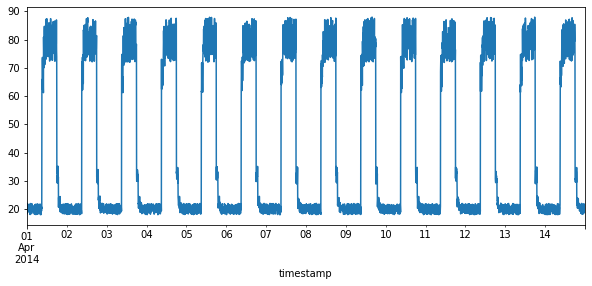

In [14]:
# set the fig size
# fig, ax = plt.subplots(figsize=(12,6))
# used pandas (plt) to plot a pamdas dataframe
# plotting onto ax i.e. axes
# use pyplot to increase fig size as desired
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
# semicolon prevents the printout of the return value
df_small_noise.plot(legend=False, ax=ax);

In [15]:
# define df_daily_jumpsup as read in csv
# describe the connection between with_anomaly_url and daily_jumsup
# i.e. why call it that
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [16]:
# printout the first 5 values in df
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [17]:
# describe the dataframe
print(df_daily_jumpsup.describe())
# print function in notebook doesnt look as nice
# better to leave out the print function as below
# pandas is clever in jupyter notebooks
# df_daily_jumpsup.describe()

             value
count  4032.000000
mean     44.494254
std      32.432473
min      18.001010
25%      19.991382
50%      21.648503
75%      76.435943
max     164.947481


In [18]:
# pandas return the 1st value in df
df_daily_jumpsup.iloc[0]['value']

19.761251903

In [19]:
# describe the shape of the df
df_daily_jumpsup.shape

(4032, 1)

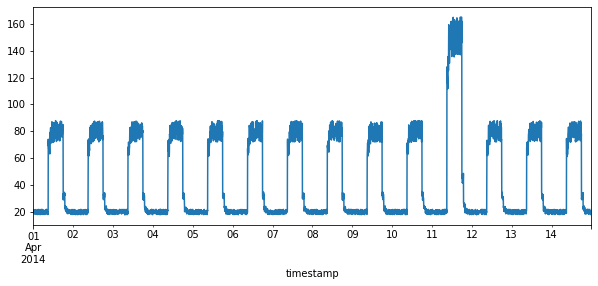

In [20]:
# set the fig size
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

## Preprocessing

###### values clean-up
##### explanation of why preprocessing is required
***

In [21]:
# get the mean of small noise
 # TECHNICAL ONE DATASET- IF WERE MORE COLUMNS WOULD MEAN ALL COLS
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [22]:
# get the sd of small noise
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [23]:
# subtract the mean from the value/divide by stdev
# essentially gets all values normalized between x and y centered on zero
# standard trick in neural networks- subtract the mean from the value/divide by stdev
# essentially gets all values normalized between x and y centered on zero
# df_train_vals not df_train as thats already in use
# ONE THING TO CONSIDER:
# DF SMALL NOISE ARRAY- COULD CREATE NEW COLUMN IN DF BT ASSIGNING VALUES TO IT
df_train_vals = (df_small_noise - train_mean) / train_std

In [24]:
# pandas return the 1st 5 values in the dataframe
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [25]:
# pandas return the last 5 values in the dataframe
df_train_vals.tail()

,value
timestamp,
2014-04-14 23:35:00,-0.791647
2014-04-14 23:40:00,-0.780255
2014-04-14 23:45:00,-0.833640
2014-04-14 23:50:00,-0.735102
2014-04-14 23:55:00,-0.846089


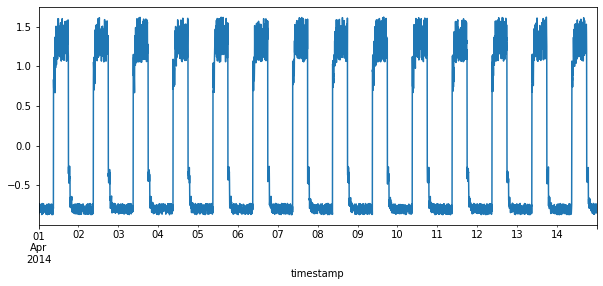

In [26]:
# first plot data frame to have a look
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [27]:
# create 
# CREATE A NEW DATASET
# SUBTRACT THE MEAN TO CREATE THE LESS MEAN
# SEE WHAT IT DOES BELOW
# DESCRIBE
# PANDAS PRINTS OFF THESE AS NEW COLUMSS
# SEE EXACLY WHAT THE TRANSFORMATION IS
# BASICALLY HAS TRANSFORED BY SUBTRACTIGN THE MEAN AND DIVIDING BY STDEV
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [28]:
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [29]:
# PRINT OUT THE MEAN OF THE COLUMNS ABOVE- WHAT DO THEY MEAN?
# MID VALUE IS MEAN OF THE LESS MEAN COLUMN (NOTE ITS VALUE E-14 SO INFITESSIMAL SMALL). ALMOST ZER0 9EFFECTIVELY ZERO)
# RIGHT VALUE IS DIV_STD OF THE LESS MEAN COLUMN (NOTE ITS VALUE E-14 SO INFITESSIMAL SMALL). ALMOST ZER0 (EFFECTIVELY ZERO) AS SHOULD BE
# IDEA BEHIND WHOLE THING IS TAKE THE VALUE COLUMN - MAKE A NEW VALUE COLUMS
# LINEARLY EQUIVALENT TO ORIGINAL BUT EFFECTIVE MEAN OF 0 AND STDEV OF 1
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [30]:
# STDEV OF THE VALUE AND LESS -MEAN ARE THE SAME -EXPLAIN
# STDEV OF DIV_STD IS 1.0 AS EXPECTED- EXPLAIN
# I.E. STDEV CENTERED BY MEAN

df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

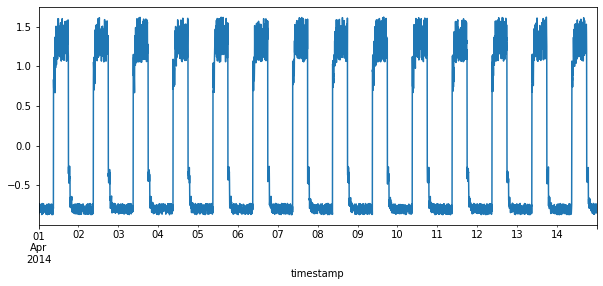

In [31]:
# define size of plot
fig, ax = plt.subplots(figsize=(10,4))

# PLOT SHOWS: TRAINING VALUES WITH MEAN/STDEV TRANSFORMATION AS AOVE ARE NOW BETWEEN +1.5 TO -0.8
# MORE LOW VALUES THAN HIGH VALUES
# EFFECTIVELY JUST SCALED THE GRAPH BY TRANSFORMING THE NUMBERS (SUBTRACT THE MEAN AND DIVIDE BY STDDEV)
# EFFECT IS STANDARDISED
# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [32]:
# have a look at the dataframe shape
# so 4032 df_train vals
df_train_vals.shape

(4032, 1)

In [33]:
# have a look at the dataframe shape
# so 4032 df_train vals
df_train_vals.columns
# so col names are values , datatype = object
# value is name of column

Index(['value'], dtype='object')

#### break down the function as per ref

In [34]:
# define the value of 'time_steps'
# which the code originally used
# renamed to window_size below
time_steps =288

In [35]:
# Generated training sequences for use in the model
#def create_sequences(values, time_steps=TIME_STEPS):
    #output = []
    #for i in range(len(values)- time_steps +1):
        #output.append(values[i : (i+ time_steps)])
    #return np.stack(output)

#def create_sequences(values, time_steps):
    #output = []
    #for i in range(len(values)- time_steps +1):
        #output.append(values[i : (i+ time_steps)])
    #return np.stack(output)

In [36]:
# originally was 'time_steps'
# slide a window of size 288 across the linear dataset
# grab each 288 into a new array/layer
# WINDOWS: QUITE COMMON THING IN DATA ANALYTICS
# WANT TO LOOK FOR A CHANGE IN TREND ACROSS SERIES OF VALUES
# RATHER THAN LOOKING AT A PARTICULAR VALUES
# lOOK AT ONE PARTICULAR VALUE IN CENTER- HOW OTHER NEIGHBOURING VALUES ARE CHANGING
# COMMON WAY IS TO HAVE A SLIDING WINDOW ACROSS THAT
# SLIDE A WINDOW OF SIZE 3 ACROSS IT 
# TAKE 1ST THREE VALUES
# MOVE ONE TO RIGHT ETC
# LAST POINT INCLUDED ONLY IN ONE WINDOW

window_size = 288

###### what they are doing to process the data ready for  reading into keras
###### each of these are whats fed into the NN
Window example:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [37]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [38]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [39]:
# Remove brackets.
len(L) - win_size + 1

10

In [40]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [41]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins
# outpus the linear array above in datadrame of len 3 starting with each element

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [42]:
# Create a 2D numpy array from wins.
# output as individual arrys
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [43]:
# create a function to create correct data shape for input to NN (Keras)
# PASS IN THE VALUES  AND WINOW SIZE AS PARAMETERS INTO THE FUCNTION
def windows(vals, N=window_size):
  # define an empty array for values
  L = []
  # iterate through vals for all windows of len N 
  for i in range(len(vals) - N + 1):
    # append another row of N vals to L[]
     # THIS IS A SLICE
    L.append(vals[i:i+N])
  # Stack i.e output L as individual arrays
  return np.stack(L)

In [44]:
# LENGTH OF THE ARRAY- N +1
# THINK ABOUT HOW MANY OF ELEMENTS GET TO BE THE FIRST ELEMENT
# I.E. EXCEPT FOR WINDOW SIZE -1 ALL WINDOWS WILL HAVE A FULL SET
# number of windows from L
d= len(L)-(win_size -1)
# remove brackets
w= len(L)-win_size +1
d,w

(10, 10)

In [45]:
# NUMBERS OF WINDOWS FROM l
len(L) -(win_size -1)

10

In [46]:
# NUMBERS OF WINDOWS FROM l (REMOVE BRACKETS) #i.e. should be the same
len(L) -win_size +1

10

In [47]:
# PRINT THE WINDOWS
for i in range(len(L) -win_size +1):
    # THIS IS A SLICE
    # 0 1ST TIME AROUND
    # UP TO BUT NOT INCLUDING  I+ WINDOW_SIZE 
    print(L[i:i + win_size]) 
# RETURNS ALL THE WINDOWS

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [48]:
# ACCUMULATING THE WINDOWS:
wins = []

# Generate the windows
for i in range(len(L) -win_size +1):
    wins.append(L[i:i + win_size]) 
wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [49]:
#STACK WINS- CREATE A 2D ARRAY FROM WINS
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [50]:
# use a numpy array
# call it x_train and create it from the original dataset
# transform the original df (4032,1) to x_train((3745, 288, 1)) using def windows()

# DF TRAIN VALS IS THE ZEROED ARRAY
# X TRAIN IS THE WINDOWS APPLIED TO DATASET

x_train = windows(df_train_vals)

In [51]:
# have a look at the array first value [0] and last value [-1]
# 288 ROWS
# KERAS WANTS EACH INDIVIDUAL VALUES IN AN INDIVIDUAL LIST
# [[VALUE]]
x_train[0][0], x_train[0][-1]

(array([-0.85882857]), array([-0.79671155]))

In [52]:
# another way to get 1st and last values from dataframe using iloc
# DF TRAIN VALS IS THE ZEROED ARRAY
# X TRAIN IS THE WINDOWS APPLIED TO DATASET

 #1ST VALUE IN TRAINING VALS IS THE FIRST VALUE IN TRAINING ARRAY- A CHECK
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [53]:
# another way to get 100th value from dataframe using iloc
df_train_vals.iloc[100]

value   -0.776113
Name: 2014-04-01 08:20:00, dtype: float64

In [54]:
# have a look at the array first value [0] and value [1]
#RETURN 1ST VALUE IN 1ST WINDOW ALONG WITH FIRST VALUE IN THE LAST WINDOW
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [55]:
# review original shape of df -i.e 4032 values
df_train_vals.shape

(4032, 1)

In [56]:
# check shape
x_train.shape

# 4032(dataset)-288(window size)+1 =3745
# ',1' says 3rd dimension of 1

#windows of size 288 ,3745 of these X_train examples

(3745, 288, 1)

In [57]:
# print out the values where 'value'
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [58]:
# return 1st window of 288 values
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

In [59]:
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

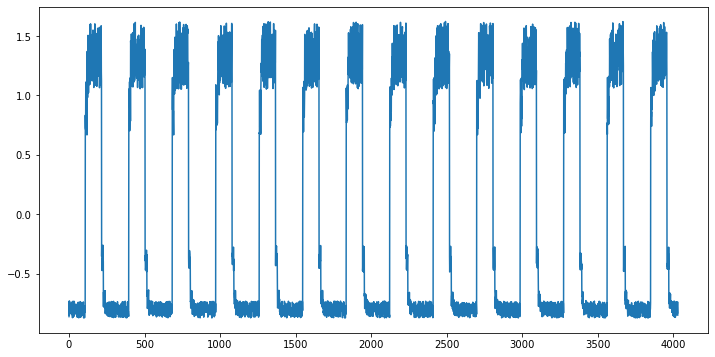

In [60]:
# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y =df_train_vals['value'].values
# y =df_train_vals['value'].values[:100] -SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:200] -SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:1200] -1ST 4 PEAKS
# EVENTUALLY WILL SEE THE STEP UP 

# QUICK HACK
# PLOT FIRST OF ALL AX.PLOT DF TRAIN VALS
# PULL OUT THE VALUES 
# RECREATE THE PLOT OF DF TRAIN VALS AS ABOVE BUT WITH MORE CONTROLS
# 4032V VALUES IN HERE
# CHANGE TO 1ST 100 -SEEWHAT HAPPENS
ax.plot(np.arange(y.shape[0]), y)

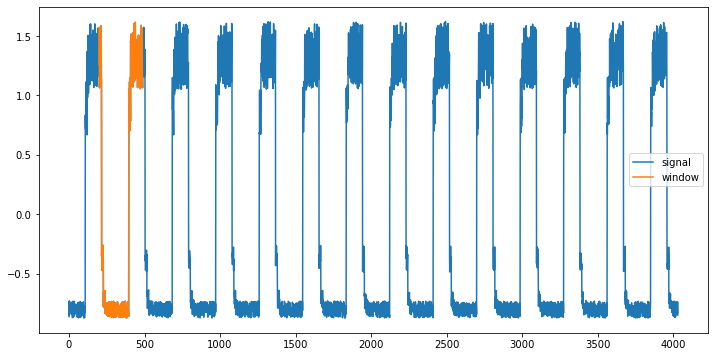

In [61]:
# DEFINE WINDOW NUMBER
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))


y = df_train_vals['value'].values # ADD [:1200] ETC TO VIEW LESS DATA


# X AXIS NOW IS NUMBER OF DATAPOINT
# THIS JUST CREATES AN ARRAY FRON 0-4032. JUST A TRICK
# CHANGE THE '0' BELOW- SEE WHAT HAPPENS
# IN ORANGE IS THE WINDOW
# CHANGE '0' TO CHANGE WINDOW
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window. 
# X TRAIN 0 (EACH VALUE IN OWN ARRAY)
# FLATTEN REMOVES THIS INNER ARRAY

w = x_train[window_no].flatten()

# CHANGE THE '0' BELOW- SEE 
# CHANGE THE WINDOW NUMBER- SEE WHAT HAPPENS
# 200TH WINDOW ETC
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

# ADD A LEGEND
ax.legend();

## Neural Network

***

In [62]:
 # get less windows than values(4032) as effectively run out of '288' 
# numbers remaining in array cannot make-up a 288 window thus not used
# keras needs the third dimension below i.e. '1'

x_train.shape

(3745, 288, 1)

In [63]:
# WHAT IS THE NEURAL NETWORK ACTUALLY DOING
# SHAPE 1 IS 288, SHAPE 2 IS 1.
# ONE DIMENSIONAL
# ALL OF THE NODES WITH 288 VALUES ARE COMING IN AS ONE
# GOOGLE CONVOLUTIONAL 1D LAYER
# EXPLAIN WHAT THIS IS
# WE HAVE AN INPUT LATER SO NO NEED FOR 1D
# GOOGLE TOWARDSDATASCIENCE.COM/UNDERSTANDING-1D-AND 3D- CONVOLUTION-NEURAL-NETWORK-KERAS
# GENERALLY WE REFER TO A 2D CNN
# ALSO 1D 3D CNN AND APPLCATIONS IN REAL WORLD
# INTRODUCED IN IMAGE CLASSIFICATION
# KERNEL SLIDES ALONG 2 DIMENSIONS ALONG THE INPUT
# LOT LIKE THE WINDOW WE HAVE ABOVE WHEN 1D
# NOT TOO DIFFICULT TO WORK OUT WHAT THE LAYER DOES
# WAS SUGGESTED  IN TDS.COM MORE COMMON TO HAVE A 2D
# CHECK TENSORFLOW - 2D CONV
# NOT THE MOST HELPFUL BUT IF GO DOWN THROUGH-# DO RESEARCH ON THIS
# LOOK AT LAYERS OF THE NN BUILT IN THIS EVAL NOTEBOOK
# HAS AN INPUT LAYER- DOES WHAT IT SATS ON THE TIN
# CONV 1D LAYER
# DROPOUT LATER
# CONV 1D LAYER
# CONV ID TRANSPOSE LAYER- MATRIX TRNSPOSE?
# ALL HAVE IS INPUT, CONVID, DROPOUT, CONV1D TRANSPOSE
# CONV 1D/CONV 1D TRANSPOSE ARE SIMILAR
# SEE IF YOU CAN FIND INFORMATION THERE

# GOAL OF PROJECT IS - SHOW YOU CAN WORK OUTSIDE COMFORT ZONE
# GIVE YOU THE TOOLS TO LOOK UP - STACKOVERFLOW/TOWARDS DATASCIENCE/DATACAMP
# GET THAT IT WILL BE TRICKY FOR YOU -
# PART OF THE ASSESSMENT
# TRY 1ST - ASK QUESTIONS IF STUCK


In [64]:
# create layers for keras
# 
# check original code
# model =keras.Sequential(
#[
 # Layers = ######
    
# Neater syntax is to extract the 'Layers'
# keep indent
# put comments in each layer
# Google: keras.layers.input 
# Google: keras.layers.Conv1D
# research what the code means and describe the layer code meaning comments below

layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [65]:
# pass in layers var into keras Sequential function
# model is an instance of keras.Sequential
# ORDER THAT THESE LAYERS ARE LISTED ABOVE IS THE WAY THAT THE NN IS GOING TO BE BUILT UP
model = keras.Sequential(layers)

In [66]:
# optimiser = Adam - find out what is this
# ADAPTIVE STOCASTIC GRADIENT DESCENT
# LITERATURE GENERALLY COMPARES ADAM OPTIMISER TO THE STANDARD OPTIMISER
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [67]:
# compile the output 'model'
# look as mse - find out what is this
# SHOULD BE ABLE TO FIGURE THIS ONE OUT
# JUST A CALCULATION THATS DONE
model.compile(optimizer=optimizer, loss="mse")

In [68]:
# print out a summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [69]:
# model.fit function
# explained here: https://keras.io/api/models/model_training_apis/

# training data fed in with both input and output data
# df_small_noise should be called 'df_no_anomaly'
# training funvtion when run
# original stopped after epoch 15

# this code stops at epoch 12/50
# Why?

history = model.fit(
    x_train,
    x_train,
    epochs=50, # USUALLY ENDS AFTER 20. CAN STOP EARLIER IF LOSS ISNT GOING DOWN MUCH
    batch_size=128, # HOW MANY WINDOWS ARE OUSHED IN AT ONE TIME TO NN
    validation_split=0.1, # ASK IT TO TO DO A LITTLE BIT OF VALIDATION IN  CALLBACKS (10% HELD BACK FOR VALIDATION)
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)
 #INTERESTIGN THING IS XTRAIN IS PASSED INTO MODEL.FIT TWICE -EXPLAIN

Epoch 1/50
27/27 [==============================] - 4s 91ms/step - loss: 0.4943 - val_loss: 0.0999
Epoch 2/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0755 - val_loss: 0.0390
Epoch 3/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0545 - val_loss: 0.0336
Epoch 4/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0464 - val_loss: 0.0285
Epoch 5/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0409 - val_loss: 0.0254
Epoch 6/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0368 - val_loss: 0.0241
Epoch 7/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0336 - val_loss: 0.0224
Epoch 8/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0311 - val_loss: 0.0217
Epoch 9/50
27/27 [==============================] - 2s 77ms/step - loss: 0.0292 - val_loss: 0.0212
Epoch 10/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0275 - val_loss: 0.0205
Epoch 11/

## Evaluation

##### evaluating the model
***

In [70]:
# look at NAB github repository
# READ.me has a list of which model works well with datasets

In [71]:
# history is the fitted model
# training loss ["loss"] and validation loss {"val_loss"]

# keras. history- there is a history dict that returned from model.fit
# look it up
# output the values
# NN KEEPS A HISTORY AS WEVE SEEN BECAUSE WE INCLUDED 'CALLBACKS' ABOVE
# IT WILL KEEP A HISTRY OF HOW THE FITTING PROCEDURE WENT
# FIGURE OUT WHAT THE 'TRAINING LOSS' AND 'VALIDATION LOSS' MEAN
history.history["loss"]

[0.49425527453422546,
 0.07553721219301224,
 0.054455552250146866,
 0.04640834778547287,
 0.04090478643774986,
 0.03675273805856705,
 0.03361443430185318,
 0.0311496052891016,
 0.029170041903853416,
 0.02745984122157097,
 0.02622819133102894,
 0.024903554469347,
 0.02383386716246605,
 0.02296566590666771,
 0.022132188081741333,
 0.02124704234302044,
 0.020509984344244003,
 0.019826460629701614,
 0.01906798966228962,
 0.018406791612505913,
 0.017817214131355286,
 0.01714320480823517,
 0.016595685854554176,
 0.016102200374007225,
 0.015511587262153625,
 0.015064259991049767,
 0.01460397057235241,
 0.014078350737690926,
 0.013626128435134888,
 0.01319257915019989,
 0.0127565311267972,
 0.012299449183046818,
 0.011976150795817375,
 0.011525050736963749,
 0.011240940541028976,
 0.010888696648180485,
 0.010622208006680012,
 0.010338377207517624,
 0.01003763172775507,
 0.009780673310160637,
 0.009522724896669388,
 0.009282872080802917,
 0.009011694230139256,
 0.008788315579295158,
 0.00857848

In [72]:
# output the values
history.history["val_loss"]

[0.09987606108188629,
 0.03896600753068924,
 0.03362417221069336,
 0.028517430648207664,
 0.025428056716918945,
 0.024136241525411606,
 0.02239835634827614,
 0.021736182272434235,
 0.02121482975780964,
 0.02049771510064602,
 0.020314430817961693,
 0.020483464002609253,
 0.020313771441578865,
 0.02103431150317192,
 0.019668834283947945,
 0.019386766478419304,
 0.018620705232024193,
 0.019293006509542465,
 0.017796441912651062,
 0.017781659960746765,
 0.016348589211702347,
 0.017016403377056122,
 0.016660714522004128,
 0.015605210326611996,
 0.014772572554647923,
 0.014369478449225426,
 0.01510922983288765,
 0.014401690103113651,
 0.013262035325169563,
 0.012560117058455944,
 0.012445449829101562,
 0.0110933193936944,
 0.010448801331222057,
 0.009730207733809948,
 0.009684569202363491,
 0.009518759325146675,
 0.008832423947751522,
 0.008760292083024979,
 0.00820132251828909,
 0.007654247339814901,
 0.007677897345274687,
 0.007192971650511026,
 0.006829554680734873,
 0.006407957524061203,

In [73]:
# history.history loss is just an array of values
# history.val_loss is just an array of values
# SHOULD BE EASY TO WORK OUT WHAT THEY MEAN

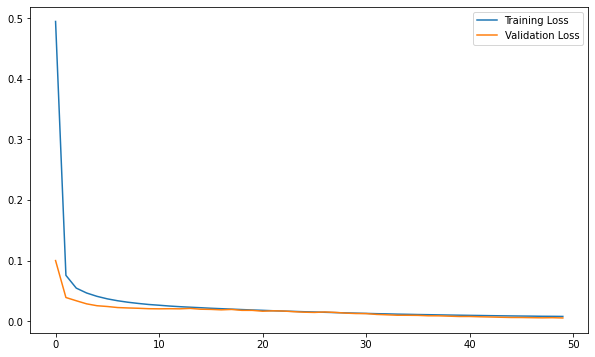

In [74]:
# pandas fig -define the size
fig, ax = plt.subplots(figsize=(10, 6))
# plot values of history.history["loss"]
ax.plot(history.history["loss"], label="Training Loss")
# plot values of history.history["val_loss"]
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [75]:
# original code from url:
# x_train_pred = model.predict(x_train)
# train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
# plotting code

# clearer to sepearte it out as below

In [76]:
# Get train MAE loss.
 #ASK IT TO DO A FEW PREDICTIONS

# what doing: get the mode that s trained to predict the vaslues out of the training set
# looking for anomalies
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 8ms/step


In [78]:
# Calculate loss...
# standard way to see how accurate you are
# take the predicted values- take absolute value. 
# THEN PLOT TRAINING MAE LOSS VS # SAMPLES - FIGURE OUT WHAT THESE MEAN 9DIFFERENCE BETWEEN TRAINIGN LOSS AND VALIDATION LOSS)
# THEN IT SHOULD BECOME CLEAR WHATS BEING PLOTTED BELOW
# Plot
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

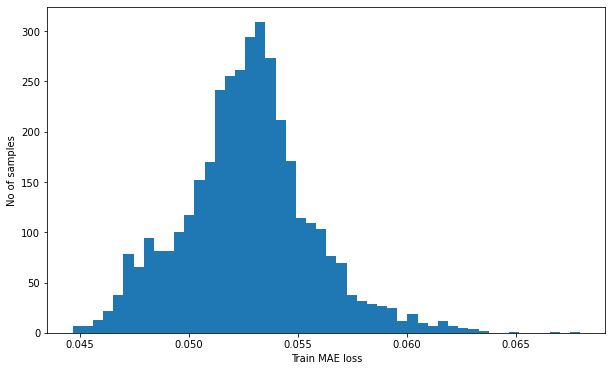

In [79]:
# Pandas fig size
fig, ax = plt.subplots(figsize=(10, 6))
# create a histogram
ax.hist(train_mae_loss, bins=50)
# add x label
ax.set_xlabel("Train MAE loss")
#add y label
ax.set_ylabel("No of samples");

# no requirement for plt(show) in jupyter

In [80]:
# Get reconstruction loss threshold.
# declare threshold
threshold = np.max(train_mae_loss)

# print out the threshold
threshold

0.06795253298628547

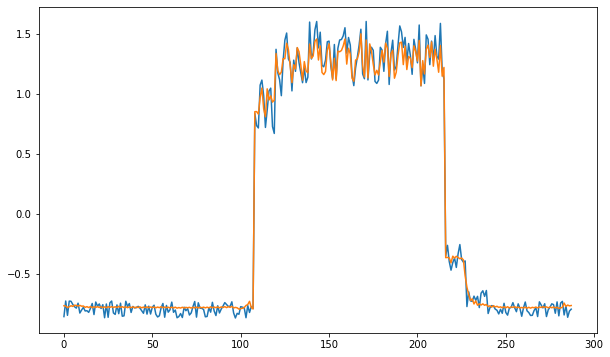

In [81]:
# BASICALLY THEY PLOT THE TRAINING SET AGAINST WHAT THE NN IS PREDICTING (BASED ON THE TRAINING INPUT) WHAT THE NN PREDICTS WHAT IT SHOULD BE
# NN IS RECEIVING TRAINING SET AS INPUT AND AN OUTPUT
# TRYING TO TRAIN ITSELF FOR THIS INPUT GIVE THE SAME THING AS OUTPUT
# WHEN ANOMALLY THE DIFF IS SIGNIFICANT
# THERE MUST BE AN ANOMALLY FOR THIS DATA
# Pandas fig size
fig, ax = plt.subplots(figsize=(10, 6))

# define x axis
ax.plot(x_train[0])

# define y axis
ax.plot(x_train_pred[0]);

# when training on the window things get smoothed out

In [82]:
# subtract the training mean and training stdev from the values

# train_mean and train_std as defined above
#  new dataset = df_daily_jumpsup
# apply anything from training set to new dataset hence same operation
# get final dataset we can plot 'df_test_value'
df_test_value = (df_daily_jumpsup - train_mean) / train_std

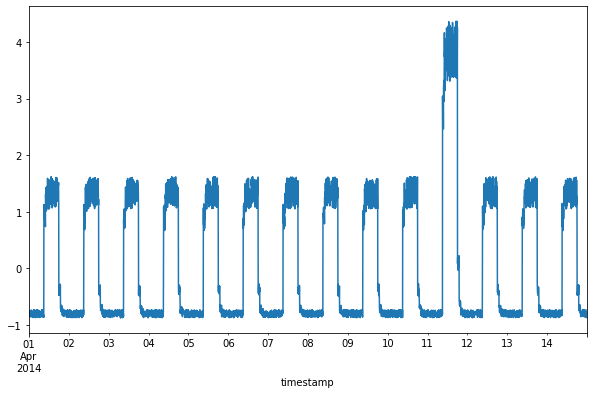

In [83]:
# define pandas fig size
fig, ax = plt.subplots(figsize=(10, 6))

#  plot df_test_value values
df_test_value.plot(legend=False, ax=ax);

In [84]:
# Create sequences from test values.
# same as above rearrange the data frame 
# window size = 288
x_test = windows(df_test_value.values)
# check the x shape as output
x_test.shape

(3745, 288, 1)

In [85]:
# feed the dataset into the keras.Sequential model
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 8ms/step


In [86]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.05272786],
       [0.05157963],
       [0.05240623],
       ...,
       [0.05221985],
       [0.0541374 ],
       [0.05180115]])

In [87]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.05272786, 0.05157963, 0.05240623, ..., 0.05221985, 0.0541374 ,
       0.05180115])

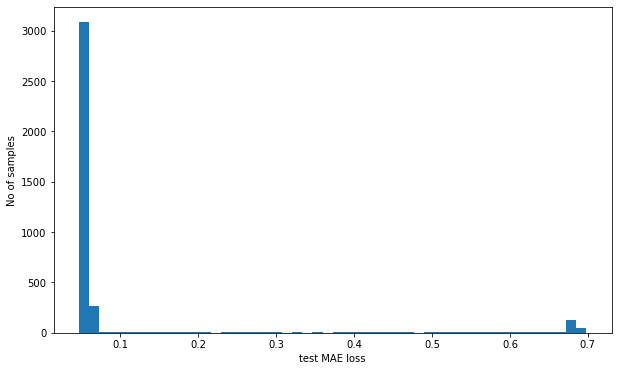

In [88]:
#SEGREGATE THE ANOMALLY

# define pandas fig size (histogram)
fig, ax = plt.subplots(figsize=(10, 6))

# plot the histogram
ax.hist(test_mae_loss, bins=50)

# set x label
ax.set_xlabel("test MAE loss")

# set y label
ax.set_ylabel("No of samples");

In [89]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# Number of anomalies.
np.sum(anomalies)

402

In [90]:
# Indices of anomalies
# DONT BOTHER DOING THIS
np.where(anomalies)

(array([2522, 2698, 2699, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708,
        2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719,
        2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730,
        2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741,
        2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752,
        2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763,
        2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774,
        2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785,
        2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796,
        2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807,
        2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818,
        2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829,
        2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840,
        2841, 2842, 2843, 2844, 2845, 

In [91]:
#original code from url
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
#anomalous_data_indices =[]
#for data_idx in range(TIME_STEPS-1, len(df_test_value) - TIME_STEPS +1):
    #if np.all(anomalies[data_idx -TIME_STEPS +1 : data_idx]):
        #anomalous_data_indices.append(data_idx)

In [92]:
# simplified
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [93]:
inds

[2988,
 2989,
 2990,
 2991,
 2992,
 2993,
 2994,
 2995,
 2996,
 2997,
 2998,
 2999,
 3000,
 3001,
 3002,
 3003,
 3004,
 3005,
 3006,
 3007,
 3008,
 3009,
 3010,
 3011,
 3012,
 3013,
 3014,
 3015,
 3016,
 3017,
 3018,
 3019,
 3020,
 3021,
 3022,
 3023,
 3024,
 3025,
 3026,
 3027,
 3028,
 3029,
 3030,
 3031,
 3032,
 3033,
 3034,
 3035,
 3036,
 3037,
 3038,
 3039,
 3040,
 3041,
 3042,
 3043,
 3044,
 3045,
 3046,
 3047,
 3048,
 3049,
 3050,
 3051,
 3052,
 3053,
 3054,
 3055,
 3056,
 3057,
 3058,
 3059,
 3060,
 3061,
 3062,
 3063,
 3064,
 3065,
 3066,
 3067,
 3068,
 3069,
 3070,
 3071,
 3072,
 3073,
 3074,
 3075,
 3076,
 3077,
 3078,
 3079,
 3080,
 3081,
 3082,
 3083,
 3084,
 3085,
 3086,
 3087,
 3088,
 3089,
 3090,
 3091,
 3092,
 3093,
 3094,
 3095,
 3096,
 3097,
 3098,
 3099,
 3100]

In [94]:
# gest the subset of df_subset where anomaliess
df_subset = df_daily_jumpsup.iloc[inds]

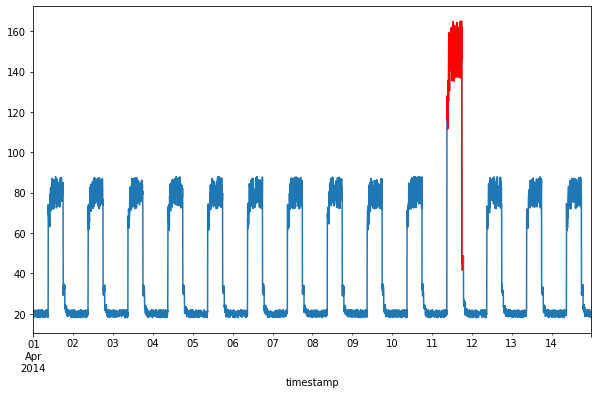

In [95]:
# WHATS PREDICTED OUT OF THIS WITH THIS ANOMALLY  FOR NN IS V DIFFERENT TO WHATS SEEN
 #NICE LITTLE PLOT THAT COULD BE 
# define pandas plot size
fig, ax = plt.subplots(figsize=(10, 6))

# plot the original dataset in blue
df_daily_jumpsup.plot(legend=False, ax=ax)

# plot anomalies over the original plot in red
df_subset.plot(legend=False, ax=ax, color="r");

In [96]:
# SHOULD HAVE A GOOD GROUNDING OF THE DATASET UNDER THE HOOD
# HERES WHATS HAPPENING -WINDOW ACROSS
# NN THAT TAKES IN WINDOW/WINDOES AS INPUT
# NN TAKES INPUT/OUTPUT AT SAME TIME
# WHEN ANOMALLY IT WILL FIND  THAT SIGNAL GOES TOO HIGH
# ABLE TO DETECT AN ANONMALLY IN THE SIGNAL

# TRICKY ENOUGH ASSESSMENT
# PULL THIS APART A BIT 
# SEE WHAT THE 

# EXPLAIN THIS SOMEHOW
# KNOW WHAT A DF IS 
#LOOK AT THE DATA - 2 DATA SETS
# SEE WHATS HAPPENING TO THOSE NUMBERS - DESPITE ADAM/VALIDATION LOSS
# ASK Q IN FORUM 
# SEND SAMPLE WHAT YOU TRIED -PRESENT A SNIPPET OF WORK

# AT VERY LEAST EVEN PUT EXPLANATIONS ON WHAT THE DATASET IS, WHER IT CAME FROM, WINDOWS, TECHHIE STUFF

# JUST HAVE TO DO WHAT YOU CAN DO

# PLENTY OF MARKS FROM THE EXERCISES


#### References:  

1. [1]: <https://github.com/numenta/NAB>
2. Tensorflow <https://www.markdownguide.org/basic-syntax/> 
3. Evaluating Real-time Anomaly Detection Algorithms - the Numenta Anomaly Benchmark https://doi.org/10.48550/arXiv.1510.03336

***

## End